# Classification model Evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Accuracy

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Importing Data

dataset = pd.read_csv("heart-disease.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
y = dataset["target"]
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
x = dataset.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()

cross_val_score(clf,x,y,cv=5)

array([0.81967213, 0.90163934, 0.7704918 , 0.8       , 0.78333333])

In [7]:
cross_score = np.mean(cross_val_score(clf,x,y,cv=5))

In [8]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score(clf,x,y,cv=5))*100:.2f}%")

Heart Disease Classifier Accuracy: 82.15%


Area Under the Curve: - ROC curve

ROC curve are a comparison of a model's true positive rate(tpr) versus a model's false  positive rate(fpr).


                      Predict           Real
      True Poistive   1                 1
      False Positive  1                 0
      True negative   0                 0
      False negative  0                 1
  



In [9]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [10]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [11]:
y_train.head()

201    0
149    1
287    0
252    0
193    0
Name: target, dtype: int64

In [12]:
# Fitting the model
clf1 = RandomForestClassifier()
clf1.fit(x_train,y_train)

RandomForestClassifier()

In [13]:
y_pred = clf1.predict_proba(x_test)
y_pred[0:10]

array([[0.82, 0.18],
       [0.37, 0.63],
       [0.39, 0.61],
       [0.09, 0.91],
       [0.17, 0.83],
       [0.87, 0.13],
       [0.74, 0.26],
       [0.32, 0.68],
       [0.29, 0.71],
       [0.03, 0.97]])

In [14]:
y_positive = y_pred[:,1]
y_positive[0:10]

array([0.18, 0.63, 0.61, 0.91, 0.83, 0.13, 0.26, 0.68, 0.71, 0.97])

In [15]:
fpr, tpr, threshold = roc_curve(y_test,y_positive,pos_label=1)

In [16]:
fpr[0:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04347826, 0.04347826])

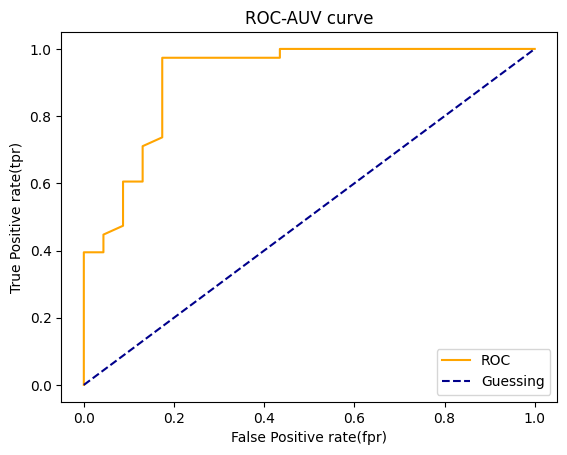

In [19]:
# Creating a function for ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
  plt.legend()
  plt.xlabel("False Positive rate(fpr)")
  plt.ylabel("True Positive rate(tpr)")
  plt.title("ROC-AUV curve")
  plt.show()

plot_roc_curve(fpr,tpr)


In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_positive)

0.914187643020595

**Confusion Matrix**

It is a quick way to compare the lables a module a model predicts and the actual result it shows.

In essence, giving you an idea where the model is getting confused.

In [21]:
from sklearn.metrics import confusion_matrix

In [23]:
y_pred = clf1.predict(x_test)

In [25]:
y_pred[0:5]

array([0, 1, 1, 1, 1])

In [26]:
confusion_matrix(y_test,y_pred)

array([[19,  4],
       [ 4, 34]])

In [27]:
19+4+4+34

61

In [28]:
len(y_test)

61

In [29]:
# Using pd.crosstab to get same result
pd.crosstab(y_test,y_pred)

col_0,0,1
target,,
0,19,4
1,4,34


<Axes: >

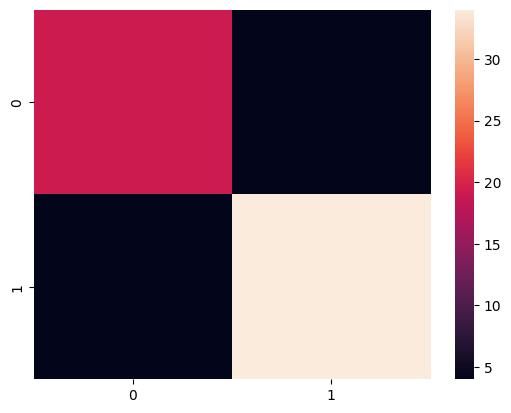

In [30]:
# Using sns to create headmap

import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred))

Confusion matrix display from sklearn

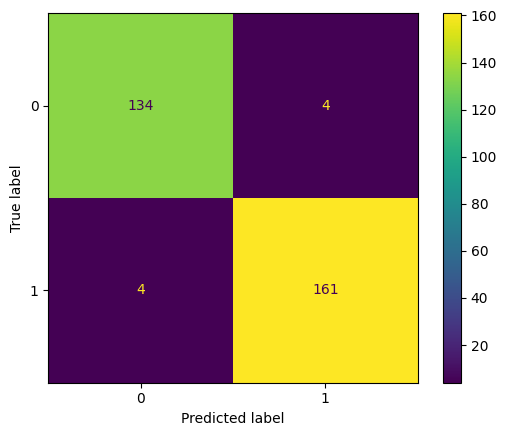

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf1,x,y)

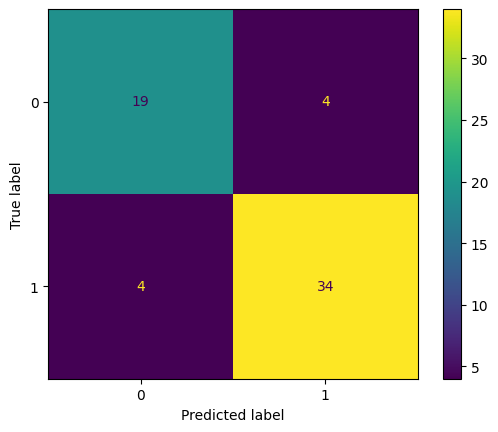

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

Classification report

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.89      0.89      0.89        38

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61

